In [1]:
import IP
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
I1 = 255*IP.rgb2gray(IP.imread('pencil_box1.jpg'))
I2 = 255*IP.rgb2gray(IP.imread('pencil_box2.jpg'))
I3 = 255*IP.rgb2gray(IP.imread('pencil_box3.jpg'))
I4 = 255*IP.rgb2gray(IP.imread('pencil_box4.jpg'))

In [86]:
I_1 = IP.imresize(I1,(512,682))
I_2 = IP.imresize(I2,(512,682))
I_3 = IP.imresize(I3,(512,682))
I_4 = IP.imresize(I4,(512,682))

In [66]:
def get_histogram(In):
    [row,col] = In.shape
    histarray = arange(0,256,1)   # This is an array to distribute our gray value
    histarray[:] = 0              # initialize the array with zero 
    for i in range(0,row):
        for j in range(0,col):
            histarray[In[i,j]] = histarray[In[i,j]]+1 # Treat itensity like the numerical order of the elements in array
                                             #and added up the number of the same itensity
    return histarray/(row*col)

In [36]:
#n,bins,patches = hist(I_1.ravel(),bins=256)

In [74]:
def entropy_map(I,r):
    [height,width]=shape(I)
    H = zeros((height,width))
    for i in range(r,height-r-1):
        for j in range(r,width-r-1):
            local = I[i-r:i+r,j-r:j+r]
            P = get_histogram(local)
            for a in range(0,256):
                if P[a]==0:
                    H[i,j]=H[i,j]
                else: 
                    H[i,j]=-P[a]*log(P[a])+H[i,j]
    return H 

In [7]:
def wei_fun(pixel):
    if pixel <= 127:
        w_z = pixel*0.9/127 + 0.05
    elif pixel > 127:
        w_z = ((255-pixel)*0.9/127)+0.05
    return w_z

In [9]:
def Uncertainty_Image(I1,I2,I3,I4,r):
    v_sum = zeros((I1.shape[0],I1.shape[1]))
    UI = zeros((I1.shape[0],I1.shape[1]))
    w1 = zeros((I1.shape[0],I1.shape[1]))
    w2 = zeros((I1.shape[0],I1.shape[1]))
    w3 = zeros((I1.shape[0],I1.shape[1]))
    w4 = zeros((I1.shape[0],I1.shape[1]))
    
    H1 = entropy_map(I1,r)
    print('H1 finished')
    H2 = entropy_map(I2,r)
    print('H2 finished')
    H3 = entropy_map(I3,r)
    print('H3 finished')
    H4 = entropy_map(I4,r)
    print('H4 finished')

    for i in range(0,I1.shape[0]):
        for j in range(0,I1.shape[1]):
            w1[i,j] = wei_fun(I1[i,j])
            w2[i,j] = wei_fun(I2[i,j])
            w3[i,j] = wei_fun(I3[i,j])
            w4[i,j] = wei_fun(I4[i,j])
            v_sum[i,j] =min(w2[i,j],w1[i,j])+\
                        min(w3[i,j],w1[i,j])+\
                        min(w3[i,j],w2[i,j])+\
                        min(w4[i,j],w1[i,j])+\
                        min(w4[i,j],w2[i,j])+\
                        min(w4[i,j],w3[i,j])
    print('v_sum has been calculated')
    
    for i in range(0,I1.shape[0]):
        for j in range(0,I1.shape[1]):
            UI[i,j] = (min(w2[i,j],w1[i,j])*abs(H2[i,j]-H1[i,j])+\
                       min(w3[i,j],w1[i,j])*abs(H3[i,j]-H1[i,j])+\
                       min(w3[i,j],w2[i,j])*abs(H3[i,j]-H2[i,j])+\
                       min(w4[i,j],w1[i,j])*abs(H4[i,j]-H1[i,j])+\
                       min(w4[i,j],w2[i,j])*abs(H4[i,j]-H2[i,j])+\
                       min(w4[i,j],w4[i,j])*abs(H4[i,j]-H3[i,j]))/\
                       v_sum[i,j]
            
    return UI


In [87]:
I_UI = Uncertainty_Image(I_1,I_2,I_3,I_4,20) #1:10

H1 finished
H2 finished
H3 finished
H4 finished
v_sum has been calculated


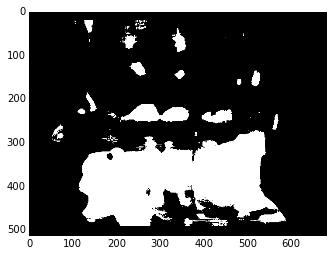

In [88]:
imshow(I_UI>0.7,cmap='gray')

In [80]:
I1.shape

(2448, 3264)